In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import matplotlib.patches as patches
import pylab
from scipy.optimize import fsolve


DataPath_1='./Data/Suppl_Data_FS5_Stoch_BBBm_Ksb001'
DataPath_2='./Data/Data_F3_Stoch_BBBm'
DataPath_3='./Data/Suppl_Data_FS5_Stoch_BBBm_Ksb15'


%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading time derivative functions

Once deleted, variables cannot be recovered. Proceed (y/[n])? н
Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath_1):
    os.makedirs(DataPath_1)
if not os.path.isfile(DataPath_1+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS5_Stoch_BBBm_Ksb001.ipynb
if not os.path.isdir(DataPath_2):
    os.makedirs(DataPath_2)
if not os.path.isfile(DataPath_2+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F3_Stoch_BBBm.ipynb
if not os.path.isdir(DataPath_3):
    os.makedirs(DataPath_3)
if not os.path.isfile(DataPath_3+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/Suppl_DataGeneration_FS5_Stoch_BBBm_Ksb15.ipynb

  0%|          | 0/30 [00:00<?, ?it/s]

Data not found. Running Data Generation script


100%|██████████| 30/30 [01:00<00:00,  2.00s/it]


Data not found. Running Data Generation script


100%|██████████| 30/30 [00:33<00:00,  1.13s/it]


In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_5examples = [viridis(0.0)[0:3],viridis(0.3)[0:3],viridis(0.55)[0:3],viridis(0.75)[0:3],viridis(0.95)[0:3]]
alpha_value=0.45
marker_sizer=2.5
dt_vis=30


h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

# FIG S5A

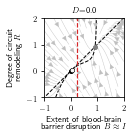

In [4]:
D_vis_vect=[0]
params=load_default_parameters('rate')

locals().update(params)

B_max = 2
R_max = 2
B_min = -1
R_min = -1

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]


    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.2,1.5,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
    
    ax0.contour(B,R,U,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')
    ax0.contour(B,R,V,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')
    
    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)
    

    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])


ax0.set_xlim([B_min,B_max])
ax0.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.0*w,1.0*w)
fig0.savefig('./Figures/Supplementary/Fig_S5A.pdf')      

# FIG S5B


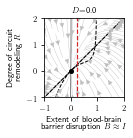

In [5]:
params['K_SB']=0.01

locals().update(params)

B_max = 2
R_max = 2
B_min = -1
R_min = -1

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]


    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.2,1.5,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
    
    ax0.contour(B,R,U,levels=[0.],colors='gray',linewidths=1.0)
    ax0.contour(B,R,V,levels=[0.],colors='gray',linewidths=1.0)
    
    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)
    

    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

params['K_SB']=0.875 # original value reset
    
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.,0.])
    
    ax0.contour(B,R,U,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')
    ax0.contour(B,R,V,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')



ax0.set_xlim([B_min,B_max])
ax0.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.0*w,1.0*w)
fig0.savefig('./Figures/Supplementary/Fig_S5B.pdf')      

# FIG S5C

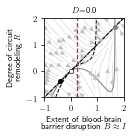

In [6]:
params['K_SB']=1.5

locals().update(params)

B_max = 2
R_max = 2
B_min = -1
R_min = -1

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]


    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-1,2,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
    
    ax0.contour(B,R,U,levels=[0.],colors='gray',linewidths=1.0)
    ax0.contour(B,R,V,levels=[0.],colors='gray',linewidths=1.0)
    
    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)
    

    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

params['K_SB']=0.875 # setting back original value
    
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.,0.])

    ax0.contour(B,R,U,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')
    ax0.contour(B,R,V,levels=[0.],colors='black',linewidths=1.0,linestyles='dashed')


ax0.set_xlim([B_min,B_max])
ax0.set_ylim([R_min,R_max])

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.0*w,1.0*w)
fig0.savefig('./Figures/Supplementary/Fig_S5C.pdf')      

# FIG S5D

In [7]:
##### Calculating seizure frequency on days 4-32 for 4 simulated intensities: matched input intensity; decreased via lowering concentration; decreased via shortening; increased via prolongation #####
N=30
day_0=4
day_end=32

for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_sim=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_dec=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
avg_num_seiz_per_day[day_0-1:day_end]
SeizFr_sem_dec=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)


for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simdec=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_orig=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_orig=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)

for ii in range(0,N): # Here we gather and extract data about seizures on respective days 
    listt=np.load(DataPath_3+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_end=listt[0]['t_end']
    S_vec=listt[1]['S_vec'].copy()
    t_vec=listt[1]['t_vec'].copy()
    seiz_days=np.ceil(t_vec[S_vec!=0])
    days=np.arange(1,t_end+1)
    num_seiz_at_days_tmp=np.arange(1,t_end+1)
    for kk in range(0,len(days)):
        num_seiz_at_days_tmp[kk]=np.sum(seiz_days==days[kk])
    if ii==0:
        num_seiz_at_days=num_seiz_at_days_tmp.copy()
    else:
        num_seiz_at_days=np.vstack([num_seiz_at_days,num_seiz_at_days_tmp])
num_seiz_at_days_simdec=num_seiz_at_days # this for statistical analysis later
# Here we gather average number of seizures per mouse per day 
avg_num_seiz_per_day = [] 
for ii in range(0,len(days)):
    avg_num_seiz_per_day=np.append(avg_num_seiz_per_day,sum(num_seiz_at_days[:,ii]))
avg_num_seiz_per_day=avg_num_seiz_per_day/len(num_seiz_at_days[:,0])
SeizFr_mean_inc=np.mean(avg_num_seiz_per_day[day_0-1:day_end])
SeizFr_sem_inc=np.std(avg_num_seiz_per_day[day_0-1:day_end])/np.sqrt(N)

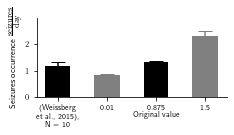

In [8]:
data = load_animal_model_data('Weissberg_et_al_2015')

fig, ax = plt.subplots()

vec=np.array([1,3])
plt.bar(np.array(vec),np.array([data['Seizure_freq_mean'],SeizFr_mean_orig]), color='black',
       yerr=[data['Seizure_freq_sem'], SeizFr_sem_orig],
       align='center',
       alpha=1,
       ecolor='black',
       capsize=10/3*2, width=0.75/3*2)
vec=np.array([2,4])
plt.bar(np.array(vec),np.array([SeizFr_mean_dec,SeizFr_mean_inc]), color='grey',
       yerr=[SeizFr_sem_dec,SeizFr_sem_inc],
       align='center',
       alpha=1,
       ecolor='grey',
       capsize=10/3*2, width=0.8/3*2)

vec=np.array([1,2,3,4])
plt.xticks(np.array(vec), ['(Weissberg \n et al., 2015),\n N = 10',
                             r"0.01",
                             '0.875 \n Original value',
                             r"1.5"], fontsize=7.5)

plt.yticks(np.arange(0,3))
plt.ylim([0,3])
plt.ylabel(r"Seizures occurrence $\frac{\textnormal{seizures}}{\textnormal{day}}$")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(3/5*4*w,w)
fig.savefig('./Figures/Supplementary/Fig_S5D.pdf')